# **Quantum Computing using PennyLane library**

This presentation is designed to introduce quantum computing using PennyLane, a versatile quantum machine learning library, with a focus on GPU capabilities. The presentation is structured using simple language, interactive examples, and hands-on coding in Jupyter Notebook.
We will explore how PennyLane can leverage GPUs for quantum computing tasks and provide real-world examples.



# Introduction to quantum Computing

## Classical vs Quantum Computing

Classical computing uses bits (0s and 1s) to process information sequentially. Quantum computing uses qubits, which can exist in multiple states simultaneously, allowing for parallel processing. Think of classical computing as a linear path through a maze, while quantum computing explores all paths at once.

### Qubits
Qubits are the fundamental unit of quantum information. Unlike classical bits, which are either 0 or 1, qubits can be in a combination of both states. Imagine a coin spinning on a table - while it's spinning, it's neither heads nor tails, but a combination of both.

### Superposition:
Superposition is the ability of a qubit to be in multiple states at once. It's like having a box with a ball that can be in every possible position inside the box simultaneously until you open it to look.
#### **Schrödinger's Cat Metaphor**
This famous thought experiment illustrates superposition. Imagine a cat in a box with a device that may or may not have killed it. According to quantum mechanics, until we open the box, the cat is simultaneously alive and dead. This represents how a qubit can be in multiple states until measured.
### Entanglement:
Entanglement occurs when qubits are connected in such a way that the state of one cannot be described independently of the other. It's like having two magical coins that always land on the same side, even when flipped far apart.
### Quantum Gates:
Quantum gates are operations applied to qubits to manipulate their states. They're similar to logic gates in classical computing, but they can create and manipulate superposition and entanglement. Think of them as special lenses that can change the "spin" of our quantum coin in unique ways.


## Why using Quantum Computing?

### Potential Applications of Quantum Computing

#### Cryptography
Quantum computers could break many current encryption methods, but also enable ultra-secure quantum encryption. This could revolutionize data security and privacy.

#### Optimization
Solving complex optimization problems in logistics, finance, and engineering. Quantum algorithms could find optimal solutions much faster than classical computers.

#### Material Science
Simulating quantum systems to discover new materials with specific properties. This could lead to breakthroughs in battery technology, solar cells, and superconductors.

#### Drug Discovery
Modeling molecular interactions to accelerate drug development and potentially find cures for diseases that are currently intractable.

#### Financial Modeling
Improving portfolio optimization, risk analysis, and fraud detection in the financial sector.

#### Climate Modeling
Enhancing climate change predictions and helping to develop more effective mitigation strategies.

### Real-World Examples: Companies Exploring Quantum Computing

#### Google
- Achieved "quantum supremacy" in 2019 with their 53-qubit Sycamore processor.
- Developing error-corrected quantum computers and quantum machine learning algorithms.

#### IBM
- Offers cloud-based quantum computing services through IBM Quantum Experience.
- Working on building larger quantum processors and developing quantum software tools.

#### Microsoft
- Developing topological qubits for more stable quantum computations.
- Created Q#, a programming language for quantum computing.

#### D-Wave Systems
- Focuses on quantum annealing for optimization problems.
- Has sold quantum annealing systems to companies and research institutions.

#### Rigetti Computing
- Building hybrid quantum-classical computing systems.
- Offers cloud access to their quantum processors.

#### IonQ
- Developing trapped-ion quantum computers.
- Achieved high-fidelity operations on their quantum processors.

These companies are pushing the boundaries of quantum computing, working to overcome current limitations and bring practical quantum applications to various industries.

# Introduction PennyLane

## What is PennyLane?
PennyLane is a cross-platform Python library for quantum computing, quantum machine learning, and quantum chemistry.

It provides a unified approach to hybrid quantum-classical computation, allowing smooth integration of quantum hardware with classical machine learning libraries like PyTorch and TensorFlow.

PennyLane offers impressive versatility through its support for multiple quantum computing backends:

* Qiskit: IBM's quantum computing framework

* Cirq: Google's quantum computing library

* Amazon Braket: Amazon's quantum computing service

* Microsoft Azure Quantum: Microsoft's cloud quantum computing platform

* Rigetti Forest: Rigetti's quantum programming toolkit

* ProjectQ: ETH Zurich's open-source quantum computing framework

This wide range of supported backends allows users to develop quantum algorithms that can run on various quantum hardware and simulators without changing their core code.

PennyLane places a strong emphasis on GPU compatibility to accelerate quantum simulations and hybrid quantum-classical computations. It leverages GPU acceleration through:

* Integration with JAX, a high-performance numerical computing library
* Support for NVIDIA cuQuantum SDK for GPU-accelerated quantum circuit simulations
* Compatibility with PyTorch and TensorFlow's GPU operations for classical processing

This GPU focus enables researchers and developers to run large-scale quantum simulations and optimize complex quantum-classical models more efficiently, significantly reducing computation time for quantum machine learning tasks.

# Setting our Jupyternotebook

### PennyLane kernel

In [6]:
%%bash
KERNEL="$HOME/.local/share/jupyter/kernels/pennylane"
mkdir -p $KERNEL
PRELOAD="$KERNEL/start.sh"
JSON="$KERNEL/kernel.json"
cat << 'EOF' > $JSON
{
 "argv": [
  "{resource_dir}/start.sh",
  "python",
  "-m",
  "ipykernel_launcher",
  "-f",
  "{connection_file}"
 ],
 "display_name": "PennyLane2",
 "language": "python",
 "metadata": {
  "debugger": true
 }
}
EOF

cat << 'EOF' > $PRELOAD
#!/bin/bash
module load matplotlib/3.7.2-gfbf-2023a
module load PennyLane-bundle/0.37.0-foss-2023a-CUDA-12.2.0
module load jax/0.4.25-gfbf-2023a-CUDA-12.1.1
exec "$@"
EOF

chmod u+x $PRELOAD

### Reload environment

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Inline matplotlib for plots in Jupyter

In [8]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline

### Import packages to be used

In [9]:
import pennylane as qml
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Using PennyLane

## Defining a Quantum Device and Circuit



### Device

The first step in `PennyLane` is to always initialize a **device** to run on.

#### Definition

Any computational object that can apply quantum operations and return a measurement value is called a quantum **device**.

In PennyLane, a device could be a hardware device (real Quantum Computer), or a software simulator (such as our high performance simulator, Qiskit ...).

NOTE: *Devices are loaded in PennyLane via the function* `device()`.

PennyLane supports devices using both the qubit model of quantum computation and devices using the Continuous Variable (CV) model of quantum computation. In fact, even a hybrid computation containing both qubit and CV quantum nodes is possible;

We will only see the qubit model with the `'default.qubit', 'lightning.qubit', 'lightning.gpu'` device provided by PennyLane.


In [ ]:
# Create a default qubit simulator with 2 qubits
dev = qml.device('default.qubit', wires=2)

For all devices, *`device`* accepts the following arguments:

-   `name`: the name of the device to be loaded
-   `wires`: the number of subsystems (qubits in qubit model) to initialize the device with. It is also possible to label the wires, for example `wires=['q1', 'q2']`

Some devices also accepts `shots` option for setting the number of circuit evaluations/random samples used to estimate expectation values of observables.



In [ ]:
# shots and qubits labels example
dev_unique_wires = qml.device('default.qubit', wires=['q1', 'q2'], shots = [5, 10, 1000])

### QNode

Now that we have initialized our device, we can begin to construct a quantum node (or QNode).

#### Definition

QNodes are an abstract encapsulation of a quantum function, described by a quantum circuit. QNodes are bound to a particular quantum device, which is used to evaluate expectation and variance values of this circuit.

QNodes can be constructed via the QNode class, or by using the provided qnode decorator.

First, we need to define the quantum function that will be evaluated in the QNode:

In [ ]:
def quantum_circuit(params):
    qml.RZ(params[0], wires=0)  # Rotate first Qubit around Z axis
    qml.Hadamard(wires=0)       # Apply Hadamard gate to the first qubit
    qml.CNOT(wires=[0, 1])      # Apply CNOT gate with control on qubit 0 and target on qubit 1
    return qml.state()          # Return the final quantum state

This is a simple circuit, applying a Hadamard gate to the first Qubit and a CNOT gate with control on qubit 0 and target on qubit 1. Notice that the function `quantum_circuit()` is constructed as if it were any other Python function; it accepts a positional argument `params`, which may be a list, tuple, or array, and uses the individual elements for gate parameters.

However, quantum functions are a **restricted subset** of Python
functions. For a Python function to also be a valid quantum function,
there are some important restrictions:

-   **Quantum functions must contain quantum operations, one operation
    per line, in the order in which they are to be applied.**

    In addition, we must always specify the subsystem the operation
    applies to, by passing the `wires` argument; this may be a list or
    an integer, depending on how many wires the operation acts on.

-   **Quantum functions must return either a single or a tuple of
    measured observables**.

    As a result, the quantum function always returns a classical
    quantity, allowing the QNode to interface with other classical
    functions (and also other QNodes).

NOTE: Certain devices may only support a subset of the available PennyLane operations/observables, or may even provide additional operations/observables. Please consult the documentation for the plugin/device for more details.

Once we have written the quantum function, we convert it into a `QNode` running on device `dev` by applying the `qnode` decorator. **directly above** the function definition:


In [ ]:
@qml.qnode(dev)
def quantum_circuit(params):
    qml.RZ(params[0], wires=0)  # Rotate first Qubit around Z axis
    qml.Hadamard(wires=0)       # Apply Hadamard gate to the first qubit
    qml.CNOT(wires=[0, 1])      # Apply CNOT gate with control on qubit 0 and target on qubit 1
    return qml.state()          # Return the final quantum state

Thus, our `quantum_circuit()` quantum function is now a *QNode*, which will run on device `dev` every time it is evaluated.

To evaluate, we simply call the function with some appropriate numerical inputs:

In [63]:
params = np.array([0, 1])
result = quantum_circuit(params)
result

tensor([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j], requires_grad=True)

We can even print the circuit:

In [64]:
print(qml.draw(quantum_circuit)(params))

0: ──H─╭●─┤  State
1: ────╰X─┤  State


A nicer circuit draw with matplotlib

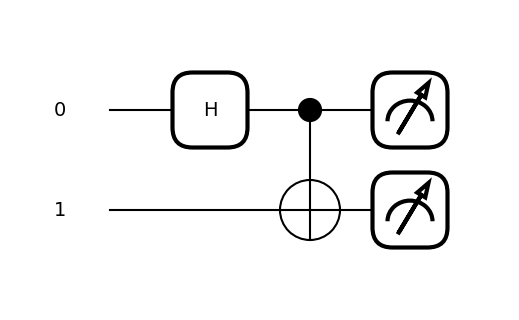

In [65]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(quantum_circuit)(params)
plt.show()

## Quantum circuits examples

Let's setup our device as follow:

In [66]:
from pennylane import numpy as np

# Create a device with 2 qubits using the default qubit simulator
dev = qml.device('default.qubit', wires=2)

#### PAULI GATES X, Y, Z

The Pauli gates are single-qubit gates that perform rotations about the respective axes of the Bloch sphere.

In [71]:
#import pennylane as qml
#from pennylane import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D


# Create a device with 2 qubits using the default qubit simulator
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def pauli_gates_circuit():
    # Apply Pauli-X gate to the first qubit
    qml.PauliX(wires=0)
    
    # Apply Pauli-Y gate to the second qubit
    qml.PauliY(wires=1)
    
    # Apply Pauli-Z gate to the first qubit
    qml.PauliZ(wires=0)
    
    # Measure expectation values of Pauli-Z for both qubits
    #return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]
    return qml.state()

# Run the circuit
results = pauli_gates_circuit()
print("Pauli Gates Circuit Output:", results)

Pauli Gates Circuit Output: [0.+0.j 0.+0.j 0.+0.j 0.-1.j]


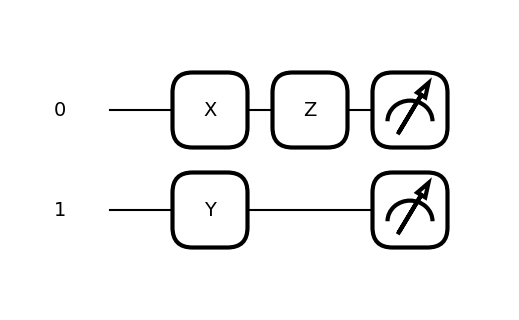

In [69]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(pauli_gates_circuit)()
plt.show()

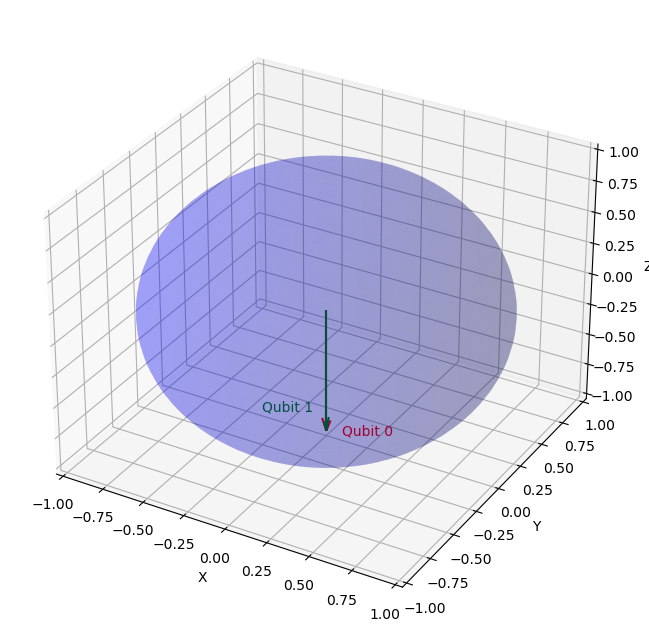

In [88]:
# Execute the circuit
state = pauli_gates_circuit()

# Extract the individual qubit states
qubit_states = []
for i in range(2):
    qubit_state = np.zeros(2, dtype=complex)
    for j in range(2):
        qubit_state[j] = state[i + 2*j]
    qubit_states.append(qubit_state)

# Extract the Bloch vector coordinates for each qubit
bloch_vectors = []
for qubit_state in qubit_states:
    theta = 2 * np.arccos(np.real(qubit_state[0]))
    phi = np.angle(qubit_state[1]) - np.angle(qubit_state[0])
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    bloch_vectors.append((x, y, z))

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Bloch sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_sphere = np.outer(np.cos(u), np.sin(v))
y_sphere = np.outer(np.sin(u), np.sin(v))
z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.2)

# Plot the Bloch vectors for each qubit
colors = ['r', 'g']
for i, bloch_vector in enumerate(bloch_vectors):
    x, y, z = bloch_vector
    ax.quiver(0, 0, 0, x, y, z, color=colors[i], length=1, arrow_length_ratio=0.1)
    ax.text(x-i/2+0.1, y, z, f'Qubit {i}', color=colors[i])

# Set the axis labels and limits
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

plt.show()

#### Hadamard gate

The Hadamard gate creates a superposition state from a computational basis state.

Hadamard Gate Circuit Output: [tensor(0., requires_grad=True), tensor(0., requires_grad=True)]


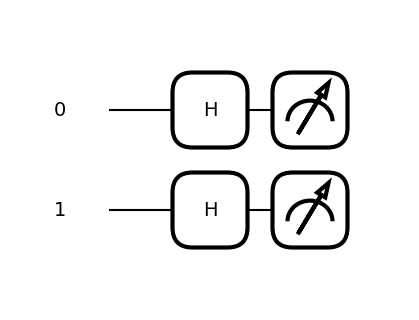

In [89]:
@qml.qnode(dev)
def hadamard_gate_circuit():
    # Apply Hadamard gate to the first qubit
    qml.Hadamard(wires=0)
    
    # Apply Hadamard gate to the second qubit
    qml.Hadamard(wires=1)
    
    # Measure expectation values of Pauli-Z for both qubits
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

# Run the circuit
print("Hadamard Gate Circuit Output:", hadamard_gate_circuit())
fig, ax = qml.draw_mpl(hadamard_gate_circuit)()
plt.show()

#### Controlled-NOT Gate (CNOT)

The Controlled-NOT (CNOT) gate is a two-qubit gate that flips the state of the second qubit (target) if the first qubit (control) is in the ∣1⟩ state.

CNOT Gate Circuit Output: [tensor(0., requires_grad=True), tensor(0., requires_grad=True)]


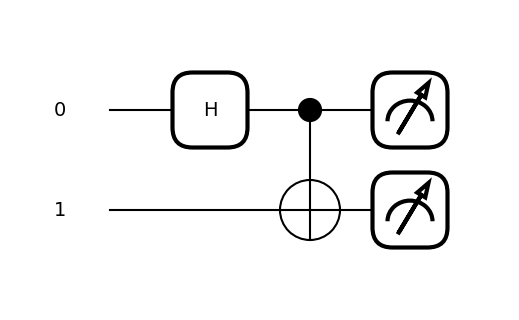

In [90]:
@qml.qnode(dev)
def cnot_gate_circuit():
    # Apply Hadamard gate to create superposition on the first qubit
    qml.Hadamard(wires=0)
    
    # Apply CNOT gate with the first qubit as control and the second qubit as target
    qml.CNOT(wires=[0, 1])
    
    # Measure expectation values of Pauli-Z for both qubits
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

# Run the circuit
print("CNOT Gate Circuit Output:", cnot_gate_circuit())
fig, ax = qml.draw_mpl(cnot_gate_circuit)()
plt.show()

### Rotation gates RX, RY, RZ

Rotation gates rotate the state of a qubit around a specific axis of the Bloch sphere by a given angle.

Rotation Gates Circuit Output: [tensor(2.22044605e-16, requires_grad=True), tensor(0.70710678, requires_grad=True)]


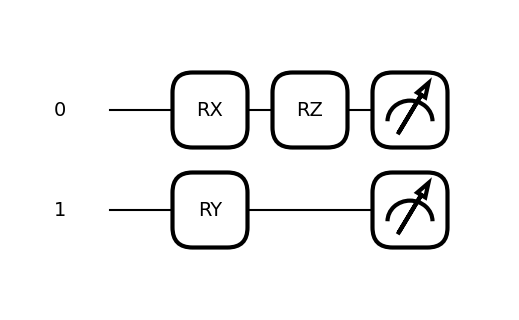

In [91]:
#import pennylane as qml
#from pennylane import numpy as np

# Create a device with 2 qubits using the default qubit simulator
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def rotation_gates_circuit(angle_x, angle_y, angle_z):
    # Apply RX rotation gate to the first qubit with angle angle_x
    qml.RX(angle_x, wires=0)
    
    # Apply RY rotation gate to the second qubit with angle angle_y
    qml.RY(angle_y, wires=1)
    
    # Apply RZ rotation gate to the first qubit with angle angle_z
    qml.RZ(angle_z, wires=0)
    
    # Measure expectation values of Pauli-Z for both qubits
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

# Example: Set rotation angles for each gate
angle_x = np.pi / 2   # Rotation angle around the X-axis for Qubit 0
angle_y = np.pi / 4   # Rotation angle around the Y-axis for Qubit 1
angle_z = np.pi / 8   # Rotation angle around the Z-axis for Qubit 0

# Run the circuit with the specified angles
results = rotation_gates_circuit(angle_x, angle_y, angle_z)
print("Rotation Gates Circuit Output:", results)

fig, ax = qml.draw_mpl(rotation_gates_circuit)(angle_x, angle_y, angle_z)
plt.show()

### Swap gate

The SWAP gate swaps the states of two qubits.

SWAP Gate Circuit Output: [tensor(1., requires_grad=True), tensor(0., requires_grad=True)]


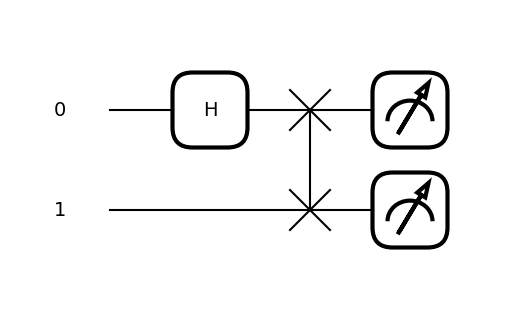

In [92]:
@qml.qnode(dev)
def swap_gate_circuit():
    # Apply Hadamard gate to the first qubit to create superposition
    qml.Hadamard(wires=0)
    
    # Apply SWAP gate between the first and second qubits
    qml.SWAP(wires=[0, 1])
    
    # Measure expectation values of Pauli-Z for both qubits
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))]

# Run the circuit
print("SWAP Gate Circuit Output:", swap_gate_circuit())
fig, ax = qml.draw_mpl(swap_gate_circuit)()
plt.show()

## Implement a 2-qubit Quantum Fourier Transform.

In [ ]:
@qml.qnode(dev)
def two_qubit_qft():
    # TODO: Apply a Hadamard gate to the first qubit
    # TODO: Apply a controlled-Phase gate (CRZ) between qubits with phase π/2
    # TODO: Apply a Hadamard gate to the second qubit
    # TODO: SWAP the two qubits
    return qml.state()

# Test your circuit
print("2-qubit QFT State:", two_qubit_qft())

# Draw the circuit

In [ ]:
# Excecute the following line to see the solution
%load ../snippets/2qft.py

Basic tutorial: qubit rotation 
==============================

To see how PennyLane allows the easy construction and optimization of
quantum functions, let\'s consider the simple case of **qubit rotation**
the PennyLane version of the \'Hello, world!\' example.

The task at hand is to optimize two rotation gates in order to flip a
single qubit from state $\left|0\right\rangle$ to state
$\left|1\right\rangle$.

The quantum circuit
-------------------

In the qubit rotation example, we wish to implement the following
quantum circuit:

<div align="center" >
  <img src="../images/qubit_rotation/rotation_circuit.png" alt="Description of the image" width="80%" height="80%">
</div>

Breaking this down step-by-step, we first start with a qubit in the
ground state $|0\rangle = \begin{bmatrix}1 & 0 \end{bmatrix}^T$, and
rotate it around the x-axis by applying the gate

$$\begin{aligned}
R_x(\phi_1) = e^{-i \phi_1 \sigma_x /2} =
\begin{bmatrix} \cos \frac{\phi_1}{2} &  -i \sin \frac{\phi_1}{2} \\
-i \sin \frac{\phi_1}{2} &  \cos \frac{\phi_1}{2}
\end{bmatrix},
\end{aligned}$$

and then around the y-axis via the gate

$$\begin{aligned}
R_y(\phi_2) = e^{-i \phi_2 \sigma_y/2} =
\begin{bmatrix} \cos \frac{\phi_2}{2} &  - \sin \frac{\phi_2}{2} \\
\sin \frac{\phi_2}{2} &  \cos \frac{\phi_2}{2}
\end{bmatrix}.
\end{aligned}$$

After these operations the qubit is now in the state

$$| \psi \rangle = R_y(\phi_2) R_x(\phi_1) | 0 \rangle.$$

Finally, we measure the expectation value
$\langle \psi \mid \sigma_z \mid \psi \rangle$ of the Pauli-Z operator

$$\begin{aligned}
\sigma_z =
\begin{bmatrix} 1 &  0 \\
0 & -1
\end{bmatrix}.
\end{aligned}$$

Using the above to calculate the exact expectation value, we find that

$$\langle \psi \mid \sigma_z \mid \psi \rangle
= \langle 0 \mid R_x(\phi_1)^\dagger R_y(\phi_2)^\dagger \sigma_z  R_y(\phi_2) R_x(\phi_1) \mid 0 \rangle
= \cos(\phi_1)\cos(\phi_2).$$

Depending on the circuit parameters $\phi_1$ and $\phi_2$, the output
expectation lies between $1$ (if
$\left|\psi\right\rangle = \left|0\right\rangle$) and $-1$ (if
$\left|\psi\right\rangle = \left|1\right\rangle$).


Creating the corresponding QNode

For this example, we will use the `lightning.qubit` device which uses a custom-built C++ backend to perform fast linear algebra calculations for simulating quantum state-vector evolution.

In [94]:
#import pennylane as qml
from jax import numpy as np
import jax

# Create the device
dev = qml.device("lightning.qubit", wires=1)

# Create our circuit
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

We can evaluate our `circuit`:

In [9]:
params = np.array([0.5236, 1.5708])
print(circuit(params))

0.85154057


Calculating quantum gradients
=============================

The gradient of the function `circuit`, encapsulated within the `QNode`, can be evaluated by utilizing the same quantum device (`dev`) that we used to evaluate the function itself.

PennyLane incorporates both analytic differentiation, as well as numerical methods (such as the method of finite differences). Both of these are done automatically.

We can differentiate by using the `jax` function. This returns another function, representing the gradient (i.e., the vector of
partial derivatives) of `circuit`. The gradient can be evaluated in the same way as the original function:


In [10]:
dcircuit = jax.grad(circuit, argnums=0)

The function `jax` itself **returns a function**, representing the derivative of the QNode with respect to the argument specified in `argnums`. In this case, the function `circuit` takes one argument (`params`), so we specify `argnums=0`. Because the argument has two elements, the returned gradient is two-dimensional. We can then evaluate this gradient function at any point in the parameter space.


In [11]:
print(dcircuit(params))

[-0.51043874 -0.1026782 ]


**A note on arguments**

Quantum circuit functions, being a restricted subset of Python
functions, can also make use of multiple positional arguments and
keyword arguments. For example, we could have defined the above quantum
circuit function using two positional arguments, instead of one array
argument:


In [12]:
@qml.qnode(dev)
def circuit2(phi1, phi2):
    qml.RX(phi1, wires=0)
    qml.RY(phi2, wires=0)
    return qml.expval(qml.PauliZ(0))

When we calculate the gradient for such a function, the usage of
`argnums` will be slightly different. In this case, `argnums=0` will
return the gradient with respect to only the first parameter (`phi1`),
and `argnums=1` will give the gradient for `phi2`. To get the gradient
with respect to both parameters, we can use `argnums=[0,1]`:


In [13]:
phi1 = np.array([0.54])
phi2 = np.array([0.12])

dcircuit = jax.grad(circuit2, argnums=[0, 1])
print(dcircuit(phi1, phi2))

(Array([-0.51043874], dtype=float32), Array([-0.1026782], dtype=float32))


Keyword arguments may also be used in your custom quantum function.
PennyLane does **not** differentiate QNodes with respect to keyword
arguments, so they are useful for passing external data to your QNode.


Optimization
============

#### Definition

If using the default NumPy/Autograd interface, PennyLane provides a collection of optimizers based on gradient descent. These optimizers accept a cost function and initial parameters, and utilize PennyLane\'s automatic differentiation to perform gradient descent.

Next, let\'s make use of PennyLane\'s built-in optimizers to optimize the two circuit parameters $\phi_1$ and $\phi_2$ such that the qubit, originally in state $\left|0\right\rangle$, is rotated to be in state $\left|1\right\rangle$. This is equivalent to reasuring a Pauli-Z expectation value of $-1$, since the state $\left|1\right\rangle$ is an eigenvector of the Pauli-Z matrix with eigenvalue $\lambda=-1$.

In other words, the optimization procedure will find the weights $\phi_1$ and $\phi_2$ that result in the following rotation on the Bloch sphere:

<div align="center" style="background-color: #f2f2f2; width: 100%; height: 100%; ">
  <img src="../images/qubit_rotation/bloch.png" alt="Description of the image" width="200%" height="100%">
</div>

To do so, we need to define a **cost** function. By *minimizing* the cost function, the optimizer will determine the values of the circuit parameters that produce the desired outcome.

In this case, our desired outcome is a Pauli-Z expectation value of $-1$. Since we know that the Pauli-Z expectation is bound between $[-1, 1]$, we can define our cost directly as the output of the QNode:


In [14]:
def cost(x):
    return circuit(x)

To begin our optimization, let\'s choose small initial values of
$\phi_1$ and $\phi_2$:


In [15]:
init_params = np.array([0.011, 0.012])
print(cost(init_params))

0.9998675


We can see that, for these initial parameter values, the cost function
is close to $1$.

Finally, we use an optimizer to update the circuit parameters for 100
steps. We can use the gradient descent optimizer:


In [16]:
import jaxopt

# initialise the optimizer
opt = jaxopt.GradientDescent(cost, stepsize=0.4, acceleration = False)

# set the number of steps
steps = 100
# set the initial parameter values
params = init_params
opt_state = opt.init_state(params)

for i in range(steps):
    # update the circuit parameters
    params, opt_state = opt.update(params, opt_state)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

ModuleNotFoundError: No module named 'jaxopt'

We can see that the optimization converges after approximately 40 steps.

Substituting this into the theoretical result
$\langle \psi \mid \sigma_z \mid \psi \rangle = \cos\phi_1\cos\phi_2$,
we can verify that this is indeed one possible value of the circuit
parameters that produces
$\langle \psi \mid \sigma_z \mid \psi \rangle=-1$, resulting in the
qubit being rotated to the state $\left|1\right\rangle$.

Note: Some optimizers, such as `AdagradOptimizer`, have internal hyperparameters that are stored in the optimizer instance.
These can be reset using the `reset` method.

Continue on to the next tutorial, `gaussian_transformation`, to see a similar example using continuous-variable (CV) quantum nodes.

In [ ]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline

Quantum Teleportation
=====================

This section wlaks through a popular quantum information technique known as *quantum teleportation*. While teleportation has been thought of as the stuff of sci-fi legend, we are going to prove that it is actually already possible today! The technique leverages many foundational principles of quantum computing, and it has lots of useful applications across the entire field. These principles include (but are not limited to): the no-cloning theorem, quantum entanglement, and the principle of deferred measurement. Let’s dive in! 

<div align="center">
  <img src="../images/teleportation/socialthumbnail_large_Quantum_Teleportation.png" width="85%">
</div>

Goal: Transferring Quantum Information
--------------------------------------

Suppose there are two researchers named Alice and Bob, and Alice wants
to send her quantum state to Bob. The quantum teleportation protocol
enables Alice to do exactly this in a very elegant manner, and it can be
described in four steps:

1\. State preparation: Alice initializes her qubit to the state she wishes to teleport.

2\. Shared entanglement: A Bell state is created and distributed to Alice and Bob (one qubit each).

3\. Change of basis: Alice converts her two qubits from the Bell basis to the computational basis.

4\. Measurement: Alice measures her two qubits, then tells Bob how to convert his qubit to obtain the desired state. Note that it is only quantum *information* being teleported, and not a physical particle.

An overview of the protocol can be seen here:

<div align="center">
  <img src="../images/teleportation/teleport_circuit_full_text.svg" width="85%">
</div>

Problem: The No-Cloning Theorem
-------------------------------

You might be wondering why we need to teleport a state at all. Can\'t
Alice just make a copy of it and send the copy to Bob? It turns out that
copying arbitrary states is *prohibited*, which you can understand using
something called the **no-cloning theorem**. The proof is surprisingly
straightforward. Suppose we would like to design a circuit (unitary
transformation) $U$ that can perform the following action:

$$\begin{aligned}
\begin{align*}
U(\vert \psi\rangle \otimes \vert s\rangle ) &= \vert \psi\rangle \otimes \vert \psi\rangle, \\
U(\vert \varphi\rangle \otimes \vert s\rangle ) &= \vert \varphi \rangle \otimes \vert \varphi \rangle,
\end{align*}
\end{aligned}$$

where $\vert \psi\rangle$ and $\vert \varphi\rangle$ are arbitrary,
normalized single-qubit states, and $\vert s \rangle$ is some arbitrary,
normalized starting state. We will now prove that no such $U$ exists!

First, let\'s take the inner product of the left-hand sides of the two
equations:

$$(\langle \psi \vert \otimes \langle s \vert) U^\dagger U(\vert \varphi\rangle \otimes \vert s\rangle ) = \langle \psi \vert \varphi\rangle \  \langle s \vert s\rangle$$

Since $\langle s \vert s\rangle$ equals 1, this evaluates to
$\langle \psi \vert \varphi \rangle$. Next, we compare the inner product
of the right-hand sides of the two equations:
$(\langle \psi \vert \varphi \rangle)^2$. These inner products must be
equal, and they are only equal if they are a value that squares to
itself. The only valid values for the inner product then are 1 and 0.
But if the inner product is 1, the states are the same; on the other
hand, if the inner product is 0, the states are orthogonal. Therefore,
we can\'t clone arbitrary states!

Solution: Quantum Teleportation
-------------------------------

We will now walk through how to share quantum information without
cloning it, one step at a time.


I. State preparation
====================

<div align="center">
  <img src="../images/teleportation/teleport_circuit_state_preparation.svg" width="85%">
</div>

Teleportation involves three qubits. Two of them are held by Alice, and
the third by Bob. We\'ll denote their states using subscripts:

1.  $\vert\cdot\rangle_S$, Alice\'s first qubit that she will prepare in
    some arbitrary state
2.  $\vert\cdot\rangle_A$, Alice\'s auxiliary (or \"ancilla\") qubit
    that she will entangle with Bob\'s qubit for communication purposes
3.  $\vert \cdot\rangle_B$, Bob\'s qubit that will receive the
    teleported state

Together, their starting state is:

$$\vert 0\rangle_S \vert 0\rangle_A \vert 0\rangle_B.$$

The first thing Alice does is prepare her first qubit in whichever state
$\vert
\psi\rangle$ that she\'d like to send to Bob so that their combined
state becomes:

$$\vert \psi\rangle_S \vert 0\rangle_A \vert 0\rangle_B.$$

We can use the following [quantum
function](https://docs.pennylane.ai/en/stable/introduction/circuits.html#quantum-functions)
to do the state preparation step:


In [2]:
import pennylane as qml
import numpy as np

def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))
    
def state_preparation(state):
    qml.StatePrep(state, wires=["S"])

II. Shared entanglement
======================

<div align="center">
  <img src="../images/teleportation/teleport_circuit_entanglement.svg" width="85%">
</div>

The reason why teleportation works is the use of an *entangled state* as
a shared resource between Alice and Bob. You can imagine some process
that generates a pair of entangled qubits, and sends one qubit to each
party. For simplicity (and simulation!), we will represent the
entanglement process as part of our circuit.

Entangling the qubits $A$ and $B$ leads to the combined state:

$$\frac{1}{\sqrt{2}}\left( \vert \psi\rangle_S \vert 0\rangle_A \vert 0\rangle_B + \vert \psi\rangle_S \vert 1\rangle_A \vert 1\rangle_B \right)\tag{1}$$

The $AB$ subsystem is now in what is known as a *Bell state*. There are
four maximally entangled two-qubit Bell states, and they form the Bell
basis:

$$\begin{aligned}
\begin{align*}
\vert \psi_+\rangle &= \frac{1}{\sqrt{2}} \left( \vert 00\rangle + \vert 11\rangle \right), \\
\vert \psi_-\rangle &= \frac{1}{\sqrt{2}} \left( \vert 00\rangle - \vert 11\rangle \right), \\
\vert \phi_+\rangle &= \frac{1}{\sqrt{2}} \left( \vert 01\rangle + \vert 10\rangle \right), \\
\vert \phi_-\rangle &= \frac{1}{\sqrt{2}} \left( \vert 01\rangle - \vert 10\rangle \right).
\end{align*}
\end{aligned}$$

In our experiment, because $AB$ started in the $\vert 00\rangle$ state,
we create the $\vert \psi_+\rangle$ Bell state as is shown in equation
(1).


In [3]:
def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

From now on, the qubit subscripts will be removed from states for
brevity.

III. Change of basis
==================

<div align="center">
  <img src="../images/teleportation/teleport_circuit_change_of_basis.svg" width="85%">
</div>

This is where things get tricky, but also very interesting. The third
step of the protocol is to apply a CNOT and a Hadamard to the first two
qubits. This is done prior to the measurements, and labelled \"change of
basis\". But what basis is this? Notice how these two gates are the
*opposite* of what we do to create a Bell state. If we run them in the
opposite direction, we transform the basis back to the computational
one, and simulate a measurement in the Bell basis.

After the basis transform, if we observe the first two qubits to be in
the state $\vert 00\rangle$, this would correspond to the outcome
$\vert \psi_+\rangle$ in the Bell basis, $\vert 11\rangle$ would
correspond to $\vert \phi_-\rangle$, etc. Let\'s perform this change of
basis, one step at a time.

Suppose we write our initial state $\vert \psi\rangle$ as
$\alpha\vert 0\rangle + \beta\vert 1\rangle$, with $\alpha$ and $\beta$
being complex coefficients. Expanding out the terms from (1), we obtain:

$$\frac{1}{\sqrt{2}} ( \alpha\vert 000\rangle +
\beta\vert 100\rangle + \alpha \vert 011\rangle +
\beta\vert 111\rangle )$$

Now let\'s apply a CNOT between Alice\'s two qubits:

$$\frac{1}{\sqrt{2}} ( \alpha\vert 000\rangle +
\beta\vert 110\rangle + \alpha \vert 011\rangle +
\beta\vert 101\rangle )$$

And then a Hadamard on her first qubit:

$$\frac{1}{2} ( \alpha \vert 000\rangle + \alpha\vert 100\rangle + \beta\vert 010\rangle - \beta\vert 110\rangle + \alpha \vert 011\rangle + \alpha \vert 111 \rangle + \beta\vert 001\rangle - \beta\vert 101 \rangle ).$$

Now we need to do some rearranging. We group the terms based on the
first two qubits:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\beta\vert 0\rangle + \alpha\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (-\beta\vert 0\rangle + \alpha\vert 1\rangle).\tag{2}$$


In [4]:
def basis_rotation():
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")

IV. Measurement
==============

<div align="center">
  <img src="../images/teleportation/teleport_circuit_measurement.svg" width="85%">
</div>

The last step of the protocol involves Alice performing a measurement on
her qubits, and telling Bob to perform some operations depending on what
she measured. But why exactly do we need to do this? In the previous
step, we already performed a basis rotation back to the computational
basis, so shouldn\'t we be good to go? Not quite, but almost!

Let\'s take another look at equation (2). If Alice measures her two
qubits in the computational basis, she is equally likely to obtain any
of the four possible outcomes. If she observes the first two qubits in
the state $\vert 00 \rangle$, she would immediately know that Bob\'s
qubit was in the state $\alpha \vert 0 \rangle + \beta \vert 1 \rangle$,
which is precisely the state we are trying to teleport!

If instead she observed the qubits in state $\vert 01\rangle$, she\'d
still know what state Bob has, but it\'s a little off from the original
state. In particular, we have:

$$\beta \vert 0 \rangle + \alpha \vert 1 \rangle = X \vert \psi \rangle.$$

After obtaining these results, Alice could tell Bob to simply apply an X
gate to his qubit to recover the original state. Similarly, if she
obtained $\vert 10\rangle$, she would tell him to apply a Z gate.

In the [\"traditional\" version of quantum
teleportation](https://quantum.country/teleportation), this is, in fact,
exactly what happens. Alice would call up Bob on the phone, tell him
which state she observed, and then he would be able to apply an
appropriate correction. In this situation, measurements are happening
partway through the protocol, and the results would be used to control
the application of future quantum gates. This is known as mid-circuit
measurement, and such mid-circuit measurements are expressed in
PennyLane using `qml.measure <pennylane.measure>`{.interpreted-text
role="func"}. Mid-circuit measurement results can be used to control
operations, and this is expressed in PennyLane using
`qml.cond <pennylane.cond>`{.interpreted-text role="func"}.


In [5]:
def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")

We\'ve now defined all the building blocks for the quantum teleportation
protocol. Let\'s put it all together!


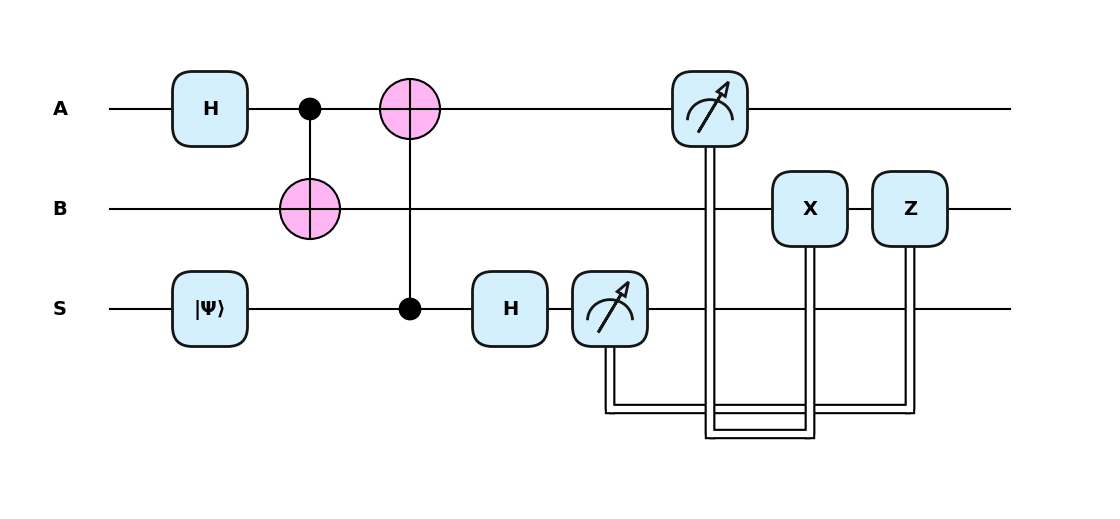

In [6]:
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()


state = np.array([1 / np.sqrt(2) + 0.3j, 0.4 - 0.5j])
_ = qml.draw_mpl(teleport, style="pennylane")(state)

There is a neat concept known as the [principle of deferred
measurement](https://en.wikipedia.org/wiki/Deferred_Measurement_Principle),
and it basically states that we can push all our measurements to the
*end* of our circuit. This can be useful for a variety of reasons, such
as when working in a system that does not support mid-circuit
measurements. In PennyLane, when you bind a circuit to a device that
does not support them, it will automatically apply the principle of
deferred measurement and update your circuit to use controlled
operations instead. Note that you need to specify
`expansion_strategy="device"` when calling `draw_mpl` so it runs the
device pre-processing before drawing the circuit.


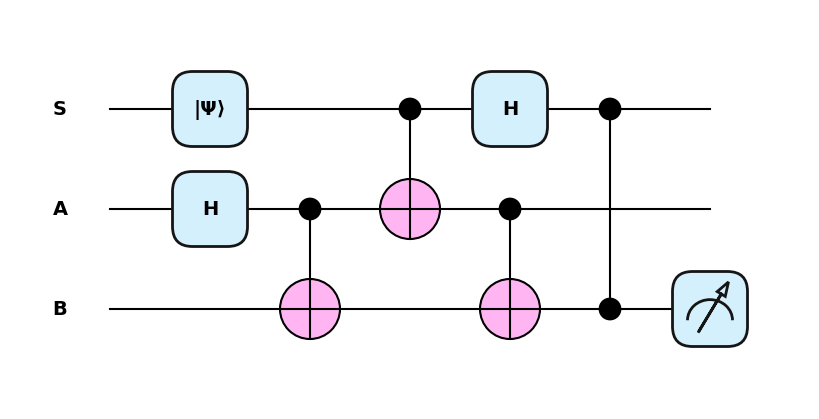

In [7]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])


@qml.qnode(dev)
def teleport(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix(wires=["B"])


_ = qml.draw_mpl(teleport, style="pennylane", expansion_strategy="device")(state)

Poof! Our classical signals have been turned into CNOT and CZ gates.
This is exactly what the principle of deferred measurement gives us ---
we can apply a CNOT instead of Alice calling Bob and telling him to
apply an X gate, and likewise for the CZ gate. This is incredibly
useful, as it allows us to perform our correction *before* any
measurements are made. Let\'s evaluate the action of the CNOT and CZ on
Bob\'s qubit, and ensure that Alice\'s state has been successfully
teleported. Applying the CNOT yields:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (\alpha\vert 0\rangle - \beta\vert 1\rangle)$$

Then, applying the CZ yields:

$$\frac{1}{2} \vert 00\rangle(\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 01\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 10\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle) + \frac{1}{2}\vert 11\rangle (\alpha\vert 0\rangle + \beta\vert 1\rangle)\tag{3}$$

When Alice measures her two qubits at the end, no matter which outcome
she gets, Bob\'s qubit will be in the state
$\alpha\vert 0\rangle + \beta \vert
1\rangle$. This means that our protocol has changed the state of Bob\'s
qubit into the one Alice wished to send him, which is truly incredible!

We can use `qml.density_matrix` to trace out and return Bob\'s subsystem as a density matrix, which is a more general description of the state of his qubit.
We will use this to verify that Alice\'s state was successfully teleported to Bob\'s qubit. Re-arranging equation (3), we can see that the final state of the system is:

$$\frac{1}{2} (\vert 00\rangle + \vert 01\rangle + \vert 10\rangle + \vert 11\rangle) \vert \psi\rangle\tag{4}$$

Now, we can confirm that our implementation of the quantum teleportation protocol is working as expected by comparing Bob\'s final density matrix to Alice\'s original density matrix:


In [8]:
def teleport_state(state):
    teleported_density_matrix = teleport(state)
    original_density_matrix = qml.math.dm_from_state_vector(state)

    if not np.allclose(teleported_density_matrix, original_density_matrix):
        raise ValueError(
            f"Alice's state ({state}) not teleported properly. "
            f"Final density matrix of Bob's subsystem: {teleported_density_matrix}"
        )
    print("State successfully teleported!")


teleport_state(state)

State successfully teleported!


Conclusion
==========

Let\'s recap the concepts we\'ve just seen.
First, we established that quantum states cannot be arbitrarily copied due to the *no-cloning theorem*. Then, we learned about *quantum entanglement*. Once Alice and Bob shared an entangled pair of qubits, Alice performed a *change of basis* from the Bell basis to the computational basis. Finally, using the *principle of deferred measurement* when needed, Alice measured her two qubits and informed Bob on how to rotate his qubit into the desired state.

<div align="center">
  <img src="../images/teleportation/teleport_circuit_full_gates.svg" width="85%">
</div>

Just like that, Alice and Bob performed quantum teleportation, and with a fairly small circuit! Some of you may now be thinking that teleportation is impossible, and you would be in good company if so.
Einstein himself referred to the non-local nature of entanglement as \"spooky action at a distance\", but we can all rest easy: due to the need for classical communication from Alice to Bob, quantum states (in other words, information) still cannot be teleported faster than the speed of light. Don\'t let that take away from the importance of quantum teleportation! This protocol is a critical tool in quantum information processing, and now it is a tool that you wield.

Reload modules

Quantum simulations using `lightning.gpu` with NVIDIA cuQuantum SDK
====

PennyLane supports GPU simulation through the `lightning.gpu` simulator device, which offloads quantum gate calls to the NVIDIA cuQuantum SDK.

### Benefits

GPUs are highly effective for workloads that heavily depend on linear algebra due to their superior floating-point processing capabilities. In classical machine learning, especially deep learning, GPUs significantly accelerate training compared to CPUs. While GPUs generally have less on-device memory than CPU nodes, they offer extremely high memory bandwidth (often hundreds of gigabytes per second) and support a vast number of concurrent threads. This makes them exceptionally well-suited for memory-bound operations like vector-vector products and vector scaling.

Additionally, GPUs have optimized implementations of fundamental mathematical operations, enhancing their performance in compute-bound tasks such as dense matrix-matrix multiplications. Since quantum mechanics is frequently expressed using linear algebra and complex numbers, these GPU strengths can be harnessed to efficiently simulate quantum circuits.

### The `lightning-gpu` simulator device

`lightning.gpu` offloads quantum gate calls to cuQuantum cuStateVec library kernels and functions, extending the work from `lightning.qubit` to capture and manipulate the Numpy data buffer in-place for direct support of machine-learning frameworks like TensorFlow, PyTorch, and JAX. The state-vector memory buffer is copied from NumPy to the GPU device, where all GPU-implemented functions are called to perform the required manipulations. Unsupported gate kernels are CPU-generated, transferred to the GPU, and cached for later reuse. Expectation values are evaluated directly on the GPU, and the state-vector is returned to a NumPy-compatible array on the host machine for easy manipulation by the end-user.

### Benchmark

As a demonstration, we take a sample quantum circuit Jacobian evaluation and compare the run-times for lightning.qubit and lightning.gpu, using adjoint backpropagation for both cases, but allowing the lightning.qubit threading support to take full advantage of the available CPU. The circuit below evaluates the Jacobian of a strongly entangling layered circuit, and was run on an NVIDIA A100, comparing an A100 40GB GPU to an AMD Epyc 7H12 CPU:

In [1]:
import pennylane as qml
import matplotlib.pyplot as plt

In [2]:
#import pennylane as qml
from timeit import default_timer as timer
import os

# To set the number of threads used when executing this script,
os.environ['OMP_NUM_THREADS'] = '128'

# Choose number of qubits (wires) and circuit layers
wires = 20
layers = 3

# Set number of runs for timing averaging
num_runs = 5

# Instantiate CPU (lightning.qubit) or GPU (lightning.gpu) device
dev_gpu = qml.device('lightning.gpu', wires=wires)
dev_cpu = qml.device('lightning.qubit', wires=wires)

# Create QNode of device and circuit
@qml.qnode(dev_cpu, diff_method="adjoint")
def circuit_cpu(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(wires))
    return qml.math.hstack([qml.expval(qml.PauliZ(i)) for i in range(wires)])    

@qml.qnode(dev_gpu, diff_method="adjoint")
def circuit_gpu(parameters):
    qml.StronglyEntanglingLayers(weights=parameters, wires=range(wires))
    return qml.math.hstack([qml.expval(qml.PauliZ(i)) for i in range(wires)])


# Set trainable parameters for calculating circuit Jacobian
shape = qml.StronglyEntanglingLayers.shape(n_layers=layers, n_wires=wires)
weights = qml.numpy.random.random(size=shape)

# Run, calculate the quantum circuit Jacobian and average the timing results
timing_cpu = []
timing_gpu = []

for t in range(num_runs):
    start = timer()
    jac = qml.jacobian(circuit_cpu)(weights)
    end = timer()
    timing_cpu.append(end - start)

for t in range(num_runs):
    start = timer()
    jac = qml.jacobian(circuit_gpu)(weights)
    end = timer()
    timing_gpu.append(end - start)

#print(qml.numpy.mean(timing))

print(timing_cpu)
print(timing_gpu)

[8.834768506931141, 9.151098940055817, 9.2119702140335, 9.15863941598218, 9.171202237950638]
[1.6982544480124488, 0.3714287990005687, 0.3715393899474293, 0.37124369002413005, 0.3702543319668621]


In [3]:
#import pennylane as qml
from timeit import default_timer as timer
import os
import numpy as np
#import matplotlib.pyplot as plt

# Parameters to test
#wires_range = range(10, 33)  # Wires from 10 to 32
wires_range = [10, 15, 20]  # Wires from 10 to 32
layers_range = range(1, 4)   # Layers from 1 to 3
omp_threads_list = [128]  # OMP_NUM_THREADS values

# Number of runs for timing averaging
num_runs = 2

# Dictionary to store timing results
timing_results = {
    'cpu': np.zeros((len(wires_range), len(layers_range), len(omp_threads_list))),
    'gpu': np.zeros((len(wires_range), len(layers_range), len(omp_threads_list)))
}

# Run simulations for each combination of parameters
for i, wires in enumerate(wires_range):
    for j, layers in enumerate(layers_range):
        for k, omp_threads in enumerate(omp_threads_list):
            # Set the number of threads
            os.environ['OMP_NUM_THREADS'] = str(omp_threads)
            
            # Instantiate CPU (lightning.qubit) or GPU (lightning.gpu) device
            dev_gpu = qml.device('lightning.gpu', wires=wires)
            dev_cpu = qml.device('lightning.qubit', wires=wires)

            # Define QNodes
            @qml.qnode(dev_cpu, diff_method="adjoint")
            def circuit_cpu(parameters):
                qml.StronglyEntanglingLayers(weights=parameters, wires=range(wires))
                return qml.math.hstack([qml.expval(qml.PauliZ(i)) for i in range(wires)])

            @qml.qnode(dev_gpu, diff_method="adjoint")
            def circuit_gpu(parameters):
                qml.StronglyEntanglingLayers(weights=parameters, wires=range(wires))
                return qml.math.hstack([qml.expval(qml.PauliZ(i)) for i in range(wires)])
            
            # Set trainable parameters
            shape = qml.StronglyEntanglingLayers.shape(n_layers=layers, n_wires=wires)
            weights = qml.numpy.random.random(size=shape)

            # Measure CPU timing
            cpu_timings = []
            for _ in range(num_runs):
                start = timer()
                jac = qml.jacobian(circuit_cpu)(weights)
                end = timer()
                cpu_timings.append(end - start)
            avg_cpu_time = np.mean(cpu_timings)
            timing_results['cpu'][i, j, k] = avg_cpu_time

            # Measure GPU timing
            gpu_timings = []
            for _ in range(num_runs):
                start = timer()
                jac = qml.jacobian(circuit_gpu)(weights)
                end = timer()
                gpu_timings.append(end - start)
            avg_gpu_time = np.mean(gpu_timings)
            timing_results['gpu'][i, j, k] = avg_gpu_time

            print(f"Completed: Wires={wires}, Layers={layers}, OMP_NUM_THREADS={omp_threads}, CPU time={avg_cpu_time:.4f}s, GPU time={avg_gpu_time:.4f}s")


Completed: Wires=10, Layers=1, OMP_NUM_THREADS=128, CPU time=0.0200s, GPU time=0.2230s
Completed: Wires=10, Layers=2, OMP_NUM_THREADS=128, CPU time=0.0174s, GPU time=0.0413s
Completed: Wires=10, Layers=3, OMP_NUM_THREADS=128, CPU time=0.0245s, GPU time=0.0537s
Completed: Wires=15, Layers=1, OMP_NUM_THREADS=128, CPU time=0.0388s, GPU time=0.0482s
Completed: Wires=15, Layers=2, OMP_NUM_THREADS=128, CPU time=0.0700s, GPU time=0.0769s
Completed: Wires=15, Layers=3, OMP_NUM_THREADS=128, CPU time=0.0996s, GPU time=0.1076s
Completed: Wires=20, Layers=1, OMP_NUM_THREADS=128, CPU time=3.4070s, GPU time=0.1590s
Completed: Wires=20, Layers=2, OMP_NUM_THREADS=128, CPU time=6.7325s, GPU time=0.4557s
Completed: Wires=20, Layers=3, OMP_NUM_THREADS=128, CPU time=9.7900s, GPU time=0.4945s


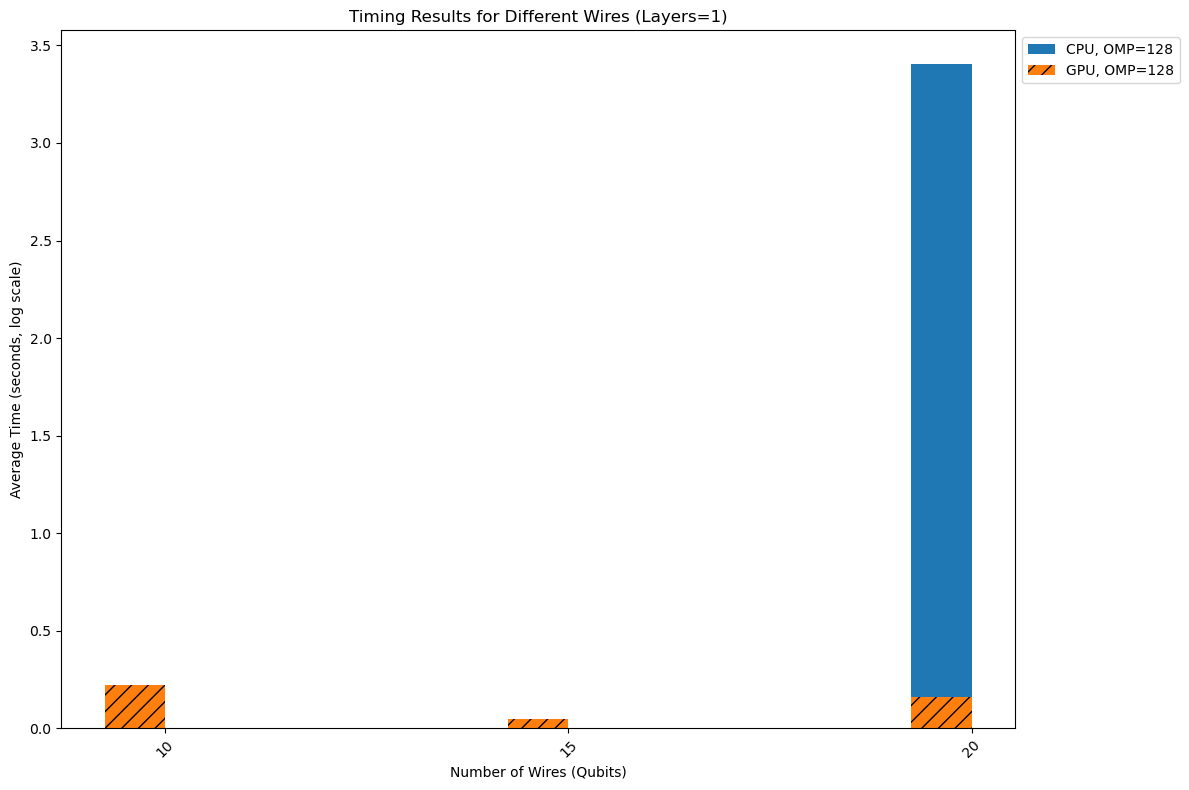

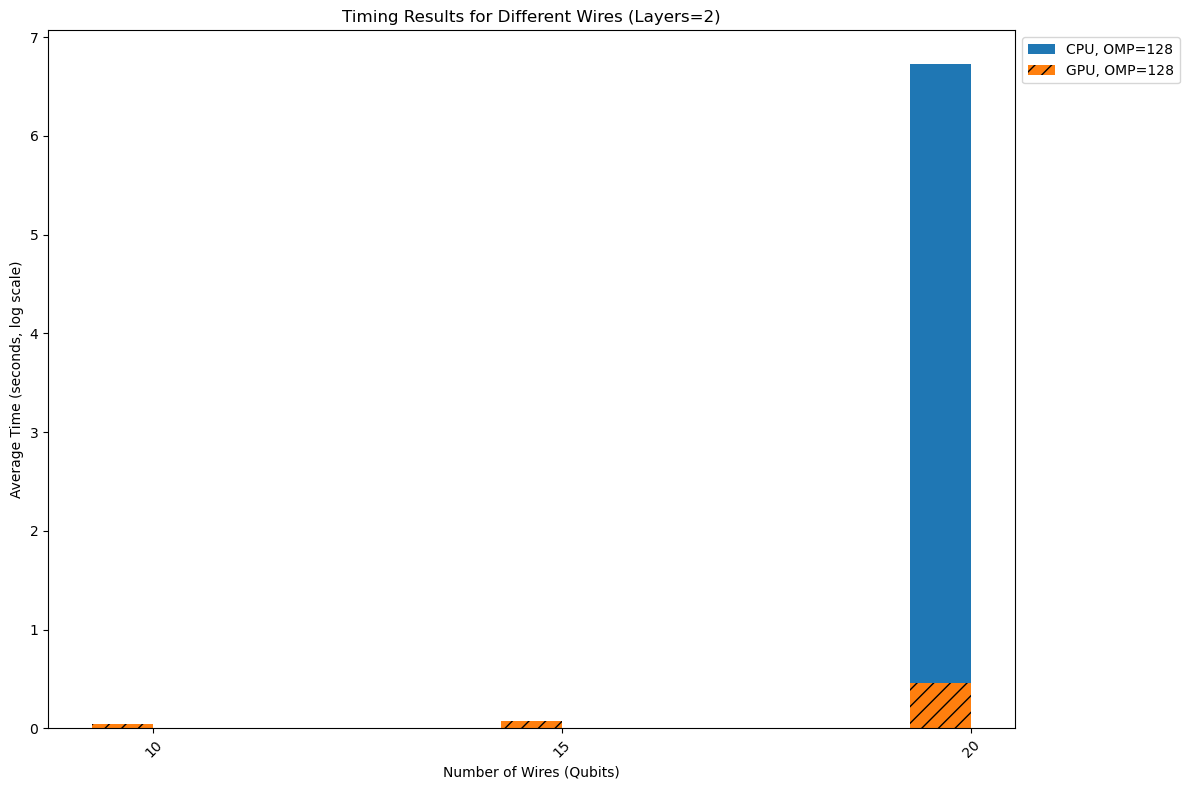

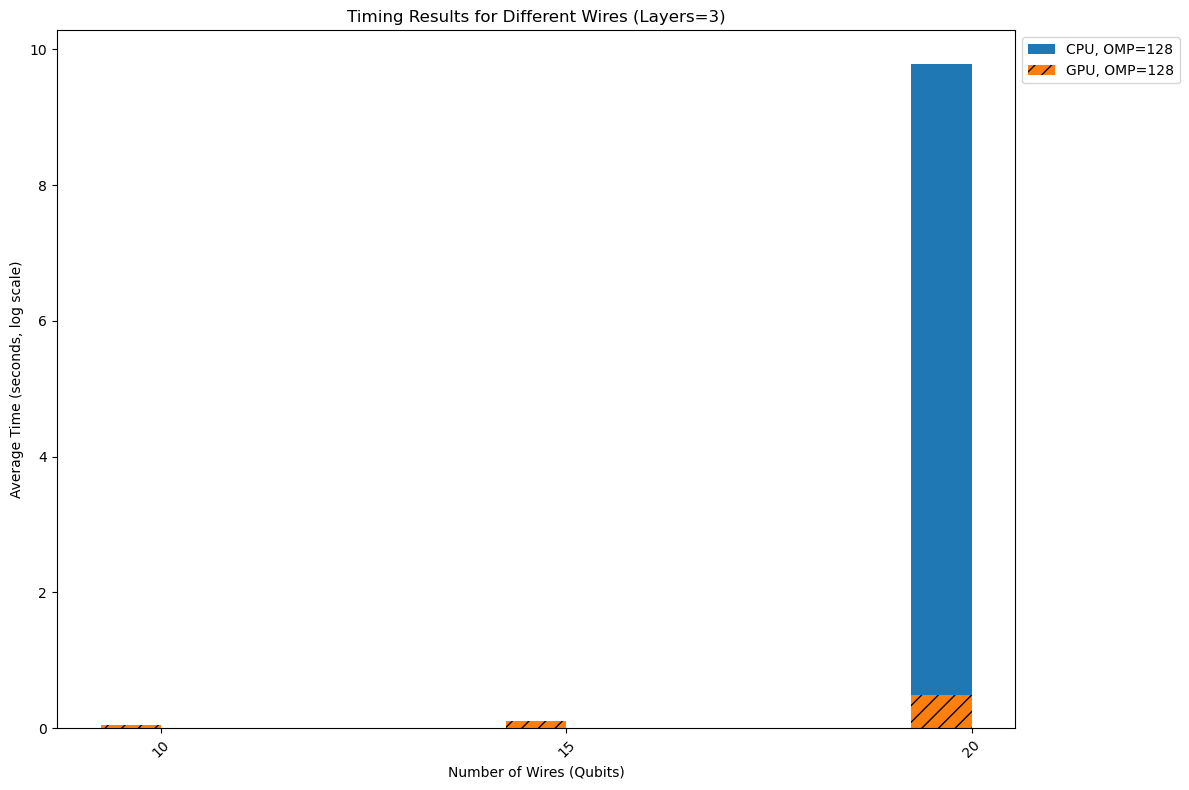

In [4]:
# Enable inline plotting
%matplotlib inline
# Plotting the results for each layer separately
for j, layers in enumerate(layers_range):
    fig, ax = plt.subplots(figsize=(12, 8))
    
    width = 0.15  # Width of the bars
    x = np.arange(len(wires_range))  # X-axis positions

    # Create bar plots for each OMP_NUM_THREADS configuration
    for k, omp_threads in enumerate(omp_threads_list):
        offset = (k - len(omp_threads_list) / 2) * width
        ax.bar(x + offset, timing_results['cpu'][:, j, k], width, label=f'CPU, OMP={omp_threads}')
        ax.bar(x + offset, timing_results['gpu'][:, j, k], width, label=f'GPU, OMP={omp_threads}', hatch='//')

    # Formatting the plot
    ax.set_xlabel('Number of Wires (Qubits)')
    ax.set_ylabel('Average Time (seconds, log scale)')
    ax.set_title(f'Timing Results for Different Wires (Layers={layers})')
    ax.set_xticks(x)
    ax.set_xticklabels(wires_range)
    #ax.set_yscale('log')  # Set y-axis to logarithmic scale
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For short circuits with few numbers of qubits, the overheads of running the GPU device (initialization, memory allocations, initial copies) can tend to dominate, but for simulations in the 20 qubits and above region the GPU device shines! The above figure shows that we see an ever-widening gap for Jacobian evaluations with over an order-of-magnitude timing reduction for large simulations relative to both single and multi-threaded CPU-based simulation. We also expect to see the same behavior for deep quantum circuits, where the initial setup overhead is minimal compared to the gates count required for the simulation.

Distributing quantum simulations using `lightning.gpu` with NVIDIA cuQuantum
=========================================================

PennyLane supports distributed state vector simulations with the `lightning.gpu` simulator device , which offloads quantum gate calls to cuStateVec, and other distributed operations to Message Passing Interface (MPI).

By adding a few addtional arguments when constructing a `lightning.gpu` device, a distributed simulation can be lauched and optimized easily, leading to better performance.

### Background

Simulating quantum systems is highly resource-intensive. State-vector simulation remains the preferred method for many quantum circuit workloads. However, a major limitation is the exponential growth in memory requirements as the number of qubits increases. On a desktop computer, simulations typically max out at around 30 qubits, and adding just a few more can exceed the memory capacity of a single high-performance computing (HPC) node. Memory management is even more crucial when using graphics processing units (GPUs). To leverage the performance advantages of GPUs, it's beneficial to use multiple GPUs in tandem to store and operate on a single state vector.


Simulating quantum systems requires storing the state vector, which grows exponentially with the number of qubits `n`. Each additional qubit doubles the size of the state vector, leading to significant memory demands. In double-precision calculations, storing the state vector of an $n-qubit$ system requires $2^n \times 2^4$ bytes of memory. This exponential growth quickly exceeds the memory capacity of single GPUs, which typically max out at 80 GB. For instance, simulating a 32-qubit system requires about 68.7 GB of memory just for the state vector. To simulate systems larger than 32 qubits, it's necessary to distribute the state vector across multiple GPUs working in tandem, as a single GPU cannot handle the memory requirements alone.

### PennyLane GPU/MPI support

Enabling distributed state vector simulation support is straightforward: just include the `mpi=True` argument when creating a `lightning.gpu` device:

In [5]:
dev = qml.device("lightning.gpu", wires = wires, mpi = True, mpi_buf_size=1024)

mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_0: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted
mel2183:rank0.python: Failed to modify UD QP to INIT on mlx5_1: Operation not permitted


/apps/USE/easybuild/release/2023.1/software/PennyLane-Lightning-GPU/0.37.0-foss-2023a-CUDA-12.2.0/lib/python3.11/site-packages/pennylane_lightning/lightning_gpu/lightning_gpu.py:278: RuntimeWarning: The MPI buffer size is larger than the local state vector size.
  warn(


With this, `lightning.gpu` will automatically distribute and initialize a complete state vector across multiple GPUs. Each GPU is assigned a subsystem and `mpi_buf_size (MiB)` of device memory shared as a data buffer to assist with the MPI communications for quantum gate calls.

### Benchmark

To demonstrate larger systems can be simulated with lightning.gpu with MPI support, and as a multi-node extension of the example above, we first take a sample quantum circuit Jacobian evaluation of a strongly entangling layered (SEL) circuit using adjoint differentiation. The script will run on four-GPU nodes. Each GPU node has 4 NVIDIA A100 40GB Tensor Core GPUs.


In [6]:
from mpi4py import MPI
import pennylane as qml
from pennylane import numpy as np
from timeit import default_timer as timer

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Set number of runs for timing averaging
num_runs = 3

print(size)

# Choose number of qubits (wires) and circuit layers
n_wires = 32
n_layers = 2

# Instantiate CPU (lightning.qubit) or GPU (lightning.gpu) device
# mpi=True to switch on distributed simulation
# batch_obs=True to reduce the device memory demand for adjoint backpropagation
dev = qml.device('lightning.gpu', wires=n_wires, mpi=True, batch_obs=True)

# Create QNode of device and circuit
@qml.qnode(dev, diff_method="adjoint")
def circuit_adj(weights):
    qml.StronglyEntanglingLayers(weights, wires=list(range(n_wires)))
    return qml.math.hstack([qml.expval(qml.PauliZ(i)) for i in range(n_wires)])

# Set trainable parameters for calculating circuit Jacobian at the rank=0 process
if rank == 0:
    params = np.random.random(qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires))
else:
    params = None

# Broadcast the trainable parameters across MPI processes from rank=0 process
params = comm.bcast(params, root=0)

# Run, calculate the quantum circuit Jacobian and average the timing results
timing = []
for t in range(num_runs):
    start = timer()
    jac = qml.jacobian(circuit_adj)(params)
    end = timer()
    timing.append(end - start)

# MPI barrier to ensure all calculations are done
comm.Barrier()

if rank == 0:
    print("num_gpus: ", size, " wires: ", n_wires, " layers ", n_layers, " time: ", qml.numpy.mean(timing)) 


1


LightningException: [/dev/shm/apps/PennyLaneLightningGPU/0.37.0/foss-2023a-CUDA-12.2.0/pennylane_lightning_gpu/pennylane_lightning_gpu-0.37.0/pennylane_lightning/core/src/utils/cuda_utils/DataBuffer.hpp][Line:66][Method:DataBuffer]: Error in PennyLane Lightning: out of memory

Using 4 GPU nodes (16 NVIDIA A100 40GB GPUs), this simulation can easily be scaled to up to 32 qubits. For short circuits with fewer qubits, the overheads of MPI communication across GPUs/nodes may tend to dominate, but for simulations in the region of 28 qubits and above, the computation scales almost linearly!

In [ ]:
from mpi4py import MPI
import pennylane as qml
import numpy as np
from timeit import default_timer as timer

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Set number of runs for timing averaging
num_runs = 3

# Choose number of qubits (wires) and circuit layers
n_wires = 33
n_layers = 2

# Instantiate CPU (lightning.qubit) or GPU (lightning.gpu) device.
# mpi=True to switch on distributed simulation
dev = qml.device('lightning.gpu', wires=n_wires, mpi=True)

# Set target wires for probability calculation
prob_wires = range(n_wires)

# Create QNode of device and circuit
@qml.qnode(dev)
def circuit(weights):
    qml.StronglyEntanglingLayers(weights, wires=list(range(n_wires)))
    return qml.probs(wires=prob_wires)

# Set trainable parameters for calculating circuit Jacobian at the rank=0 process
if rank == 0:
    params = np.random.random(qml.StronglyEntanglingLayers.shape(n_layers=n_layers, n_wires=n_wires))
else:
    params = None

# Broadcast the trainable parameters across MPI processes from rank=0 process 
params = comm.bcast(params, root=0)

# Run, calculate the quantum circuit Jacobian and average the timing results
timing = []
for t in range(num_runs):
    start = timer()
    local_probs = circuit(params)
    end = timer()
    timing.append(end - start)

# MPI barrier to ensure all calculations are done
comm.Barrier()

if rank == 0:
    print("num_gpus: ", size, " wires: ", n_wires, " layers ", n_layers, " time: ", qml.numpy.mean(timing)) 


Simulations of a 33-qubit system distributed across multiple GPUs demonstrate that computation accelerates with more GPUs, exhibiting near-linear scalability and maintaining parallel efficiency even when utilizing up to 256 GPUs.

### Conclusion

With MPI support, `lightning.gpu` enables large-scale quantum workloads using multiple nodes and GPUs, making previously intractable simulations feasible. Benchmark tests demonstrate that systems with over 30 qubits can be simulated through distributed computing, with performance improving as more GPUs are employed. By integrating full feature parity into its MPI backend, simulations that once ran on a single GPU can now be easily extended to multi-node and multi-GPU setups by adding a few additional arguments when configuring the `lightning.gpu` device.